<a href="https://colab.research.google.com/github/EndoTaishi/SeaIceExtentMME/blob/add-MMA/SeaIceExtentMME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### 適切にディレクトリを移動するように書き直してみてください

### Set up
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# change current directory
%cd /content/drive/MyDrive/seminar2023/nozue/sea_icemodel

# check the content of current directory 
# %ls

Mounted at /content/drive
/content/drive/MyDrive/seminar2023/nozue/sea_icemodel


In [2]:
pip install netCDF4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.0 MB/s eta 0:00:00


<ipython-input-23-37008d292bc1>:42: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  sum_siextenth.append(ds['siextentn'][i])


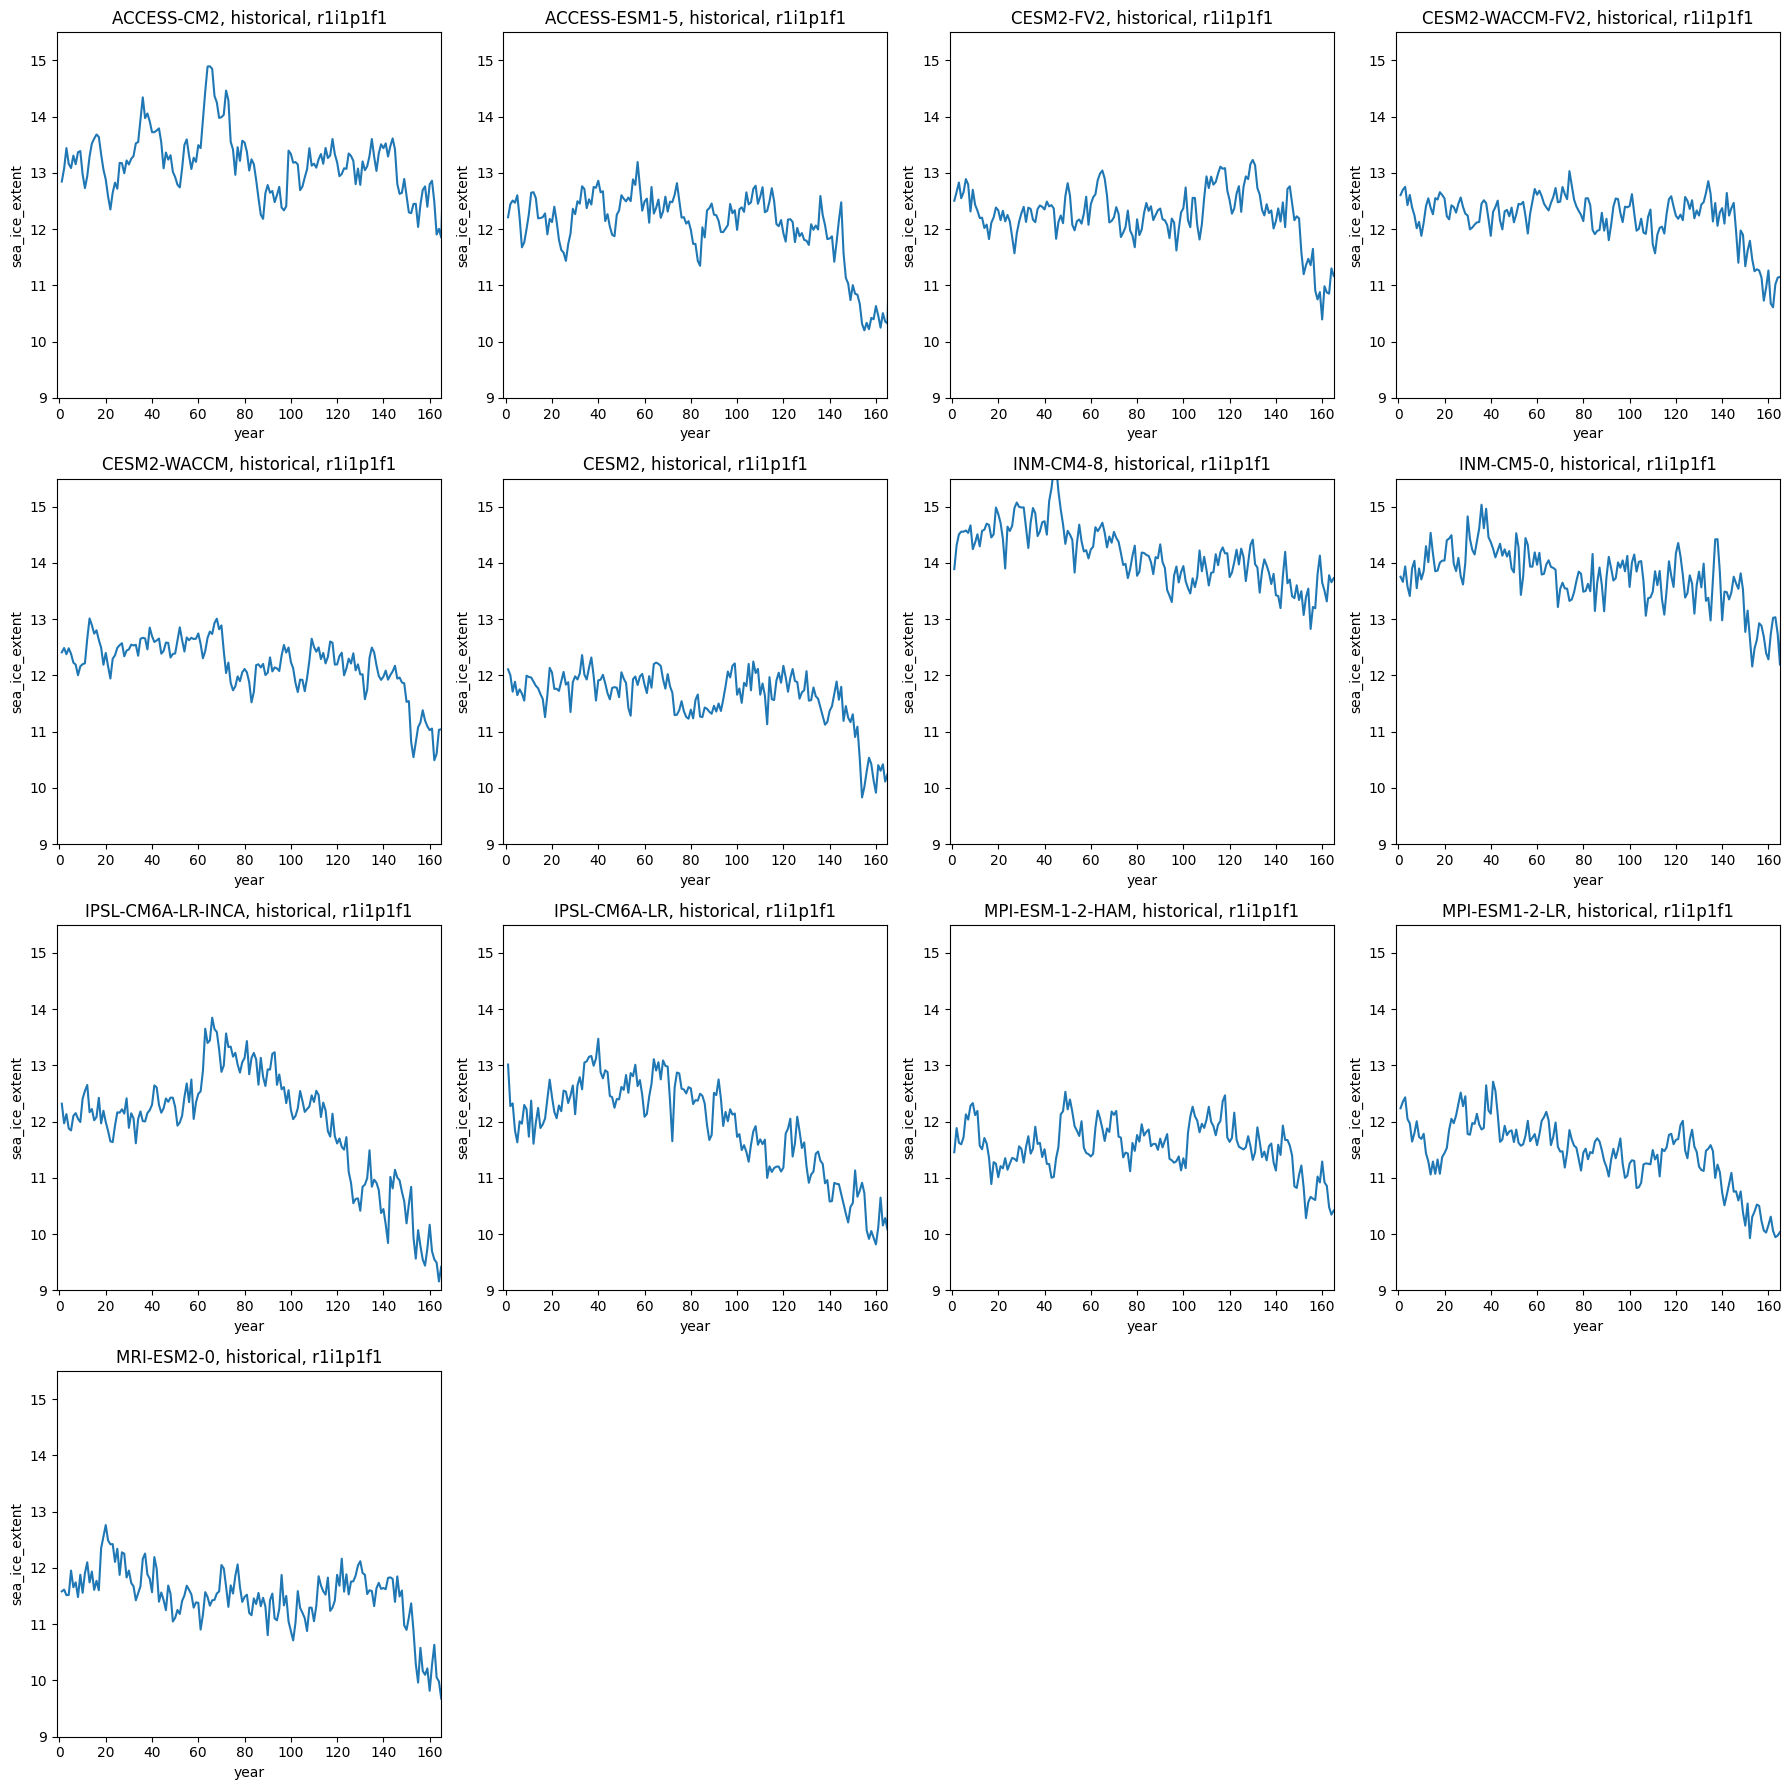

In [23]:
### Import modules
import os
import csv
import math
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt

### Set variables & constants
scenario = 'historical'
ensemble = 'r1i1p1f1'

### Store file names by model names into directory
model_dict = {}
filenames = sorted(os.listdir())
for filename in filenames:
  model_name = filename.split('_')[2]

  if model_name not in model_dict:
    model_dict[model_name] = [filename]
  else:
    model_dict[model_name].append(filename)

### Plot average of sea ice extent every model
model_num = len(model_dict)
num_cols = math.ceil(math.sqrt(model_num))
num_rows = math.ceil(model_num / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 18))

# store sea ice extent throughout all the years by models
for model_idx, (model_name, files) in enumerate(model_dict.items()):
  sum_siextenth = []
  for file in files:
    ds = Dataset(file, mode='r',format="NETCDF4")
    run_time = len(ds['time'])
    
    for i in range(run_time):
      if len(ds['siextentn'].dimensions) > 1:
        sum_siextenth.append(ds['siextentn'][i][0][0])
      else:
        sum_siextenth.append(ds['siextentn'][i])

  #lists & variables
  ice_map = []
  year_map = []
  count = 0
  sum = 0
  ave = 0
  
  # calculate average of sea ice extent every year
  for i in range(len(sum_siextenth)):
    sum += sum_siextenth[i]
    count += 1
    if count % 12 == 0:
      ave = sum / 12
      ice_map.append(ave)
      sum = 0
  
  for i in range(len(ice_map)):
    year_map.append(i+1)

  ax = axs[model_idx // num_cols, model_idx % num_cols]

  ax.plot(year_map, ice_map)
  ax.set_ylim(9.0,15.5)
  ax.set_xlim(-1,165)
  ax.set_ylabel('sea_ice_extent')
  ax.set_title(f'{model_name}, {scenario}, {ensemble}')
  ax.set_xlabel('year')

# If models are less than num_rows * num_cols
for i in range(model_idx+1, num_rows*num_cols):
  fig.delaxes(axs.flatten()[i]) 

plt.tight_layout()
plt.show()